In [38]:
import torch
from torch import nn
import matplotlib.pyplot as plt

from helper_functions import plot_decision_boundary

In [9]:
data = torch.tensor(
    [
        [0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]
    ]
)
labels = torch.tensor([0., 1., 1., 0.])

In [98]:
hidden = 3
model = nn.Sequential(
    nn.Linear(2, hidden),
    nn.ReLU(),
    nn.Linear(hidden, 1)
)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return correct / len(y_pred) * 100

In [99]:
epochs = 1000
for epoch in range(epochs):
    y_logits = model(data).squeeze()
    y_preds = torch.round(y_logits)
    
    loss = loss_fn(y_logits, labels)
    acc = accuracy_fn(labels, y_preds)

    if epoch % (epochs//10) == 0:
        print(f"[EPOCH {epoch+1}/{epochs}] Loss: {loss} | Accuracy: {acc}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

[EPOCH 1/1000] Loss: 0.7476738095283508 | Accuracy: 25.0
[EPOCH 101/1000] Loss: 0.541828453540802 | Accuracy: 75.0
[EPOCH 201/1000] Loss: 0.31106051802635193 | Accuracy: 50.0
[EPOCH 301/1000] Loss: 0.15971091389656067 | Accuracy: 0.0
[EPOCH 401/1000] Loss: 0.08884327113628387 | Accuracy: 0.0
[EPOCH 501/1000] Loss: 0.056600820273160934 | Accuracy: 0.0
[EPOCH 601/1000] Loss: 0.03959127515554428 | Accuracy: 0.0
[EPOCH 701/1000] Loss: 0.029537690803408623 | Accuracy: 0.0
[EPOCH 801/1000] Loss: 0.023164823651313782 | Accuracy: 0.0
[EPOCH 901/1000] Loss: 0.018786972388625145 | Accuracy: 0.0


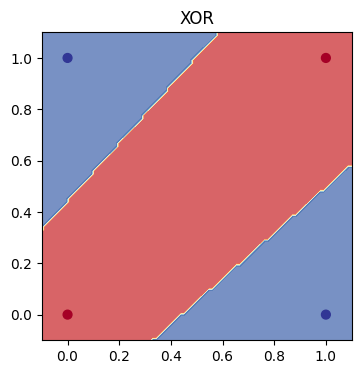

In [100]:
plt.figure(figsize=(4, 4))
plt.title("XOR")
plot_decision_boundary(model, data, labels)